In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc

In [40]:
data=sc.loadmat("ex3data1.mat")

In [41]:
x=data["X"]
y=data["y"]

In [42]:
x.shape

(5000, 400)

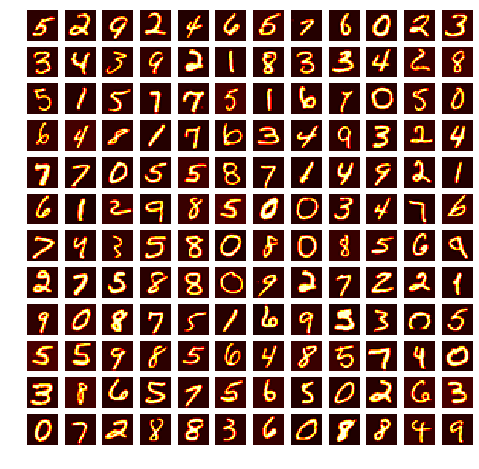

In [43]:
import matplotlib.image as matimg
fig,axis=plt.subplots(12,12,figsize=(8,8))
for i in range(12):
    for j in range(12):
        axis[i,j].imshow(x[np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="hot")
        axis[i,j].axis("off")

In [44]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [45]:
def costfunction(x,y,theta,Lambda):
    m=len(y)
    pred=sigmoid(x @ theta)
    pr=(y*np.log(pred))+((1-y)*np.log(1-pred))
    ncost=(-1/m)*sum(pr)
    n_regcost=ncost+((Lambda/(2*m))*sum(theta[1:]**2))
    #calc gradient
    t_0=1/m* (x.T @ (pred-y))[0]
    t_1=1/m* (x.T @(pred-y))[1:]+((Lambda/m)*theta[1:])
    grad=np.vstack((t_0[:,np.newaxis],t_1))
    return n_regcost[0],grad

In [46]:
def gradient_descent(x,y,theta,Lambda,itera,alpha):
    m=len(y)
    history=[]
    for i in range(itera):
        cos,grad=costfunction(x,y,theta,Lambda)
        theta=theta-(alpha*grad)
        history.append(cos)
    return theta,history 

In [47]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
J, grad = costfunction(X_t, y_t,theta_t, 3)
print("Cost:",J,"Expected cost: 2.534819")
print("Gradients:\n",grad,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: 2.534819396109744 Expected cost: 2.534819
Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [48]:
def onevall(x,y,labels,Lambda):
    m,n=x.shape[0],x.shape[1]
    str_theta=np.zeros((n+1,1))
    new_theta=[]
    new_cost=[]
    X=np.hstack((np.ones((m,1)),x))
    for i in range(1,labels+1):
        thetar,costh=gradient_descent(X,np.where(y==i,1,0),str_theta,Lambda,800,1)
        new_theta.extend(thetar)
        new_cost.extend(costh)
    return np.array(new_theta).reshape(labels,n+1),new_cost

        

In [49]:
ftheta,fcost=onevall(x,y,10,0.1)

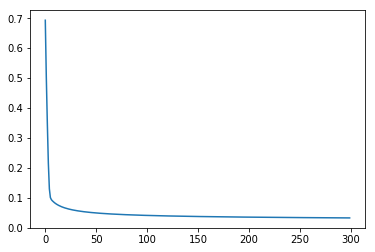

In [50]:
plt.plot(fcost[:300])
plt.show()

In [51]:
def predonevall(nt,X):
    n=X.shape[0]
    X=np.hstack((np.ones((n+1)),X))
    predict=X @ nt.T
    return np.argmax(predict,axis=1)+1